In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
os.environ["OPENBLAS_NUM_THREADS"] = "2"
os.environ["MKL_NUM_THREADS"] = "2"
os.environ["NUMEXPR_NUM_THREADS"] = "2"

In [5]:
%pip install -U "huggingface_hub[cli]"

Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
dest = os.path.expanduser("~/Desktop/MBD-mini")  # puts it on your Desktop
os.makedirs(dest, exist_ok=True)

In [7]:
!huggingface-cli download --repo-type dataset ai-lab/MBD-mini --local-dir "{dest}" --local-dir-use-symlinks False

/opt/anaconda3/lib/python3.12/site-packages/huggingface_hub/commands/download.py:141: FutureWarning: Ignoring --local-dir-use-symlinks. Downloading to a local directory does not use symlinks anymore.
  warnings.warn(
⚠️  Warning: 'huggingface-cli download' is deprecated. Use 'hf download' instead.
Fetching 6 files:   0%|                                   | 0/6 [00:00<?, ?it/s]Still waiting to acquire lock on /Users/tamannamathur/Desktop/MBD-mini/.cache/huggingface/.gitignore.lock (elapsed: 0.1 seconds)

.gitattributes: 2.42kB [00:00, 531kB/s]
Download complete. Moving file to /Users/tamannamathur/Desktop/MBD-mini/.gitattributes
Fetching 6 files: 100%|███████████████████████████| 6/6 [00:03<00:00,  1.95it/s]
/Users/tamannamathur/Desktop/MBD-mini


In [8]:
%pip install -U pandas numpy scikit-learn lightgbm xgboost shap matplotlib joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 23.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 24.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.6/547.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 25.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ma

In [10]:
from pathlib import Path
import tarfile, pandas as pd

ROOT = Path("/Users/tamannamathur/Desktop/MBD-mini")  # change only if your folder is elsewhere
assert ROOT.exists(), ROOT

# 1) See what's actually there
print("Contents of MBD-mini:")
for p in sorted(ROOT.iterdir()):
    print(" -", p.name)

# 2) If you see .tar.gz files, extract them (this puts files/folders into MBD-mini)
for tgz in ROOT.glob("*.tar.gz"):
    print("Extracting", tgz.name)
    with tarfile.open(tgz, "r:gz") as t:
        t.extractall(ROOT)
print("Extraction step done.")

Contents of MBD-mini:
 - .cache
 - .gitattributes
 - README.md
 - client_split.tar.gz
 - detail.tar.gz
 - ptls.tar.gz
 - targets.tar.gz
Extracting targets.tar.gz
Extracting ptls.tar.gz


/var/folders/z_/nf29c7x975d3hdlg2jryf2800000gn/T/ipykernel_11830/724228269.py:16: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  t.extractall(ROOT)


Extracting detail.tar.gz
Extracting client_split.tar.gz
Extraction step done.


In [12]:
from itertools import islice
all_paths = list(sorted(ROOT.rglob("*")))
for p in islice(all_paths, max(0, len(all_paths)-50), None):
    print(p.relative_to(ROOT))

targets/fold=4/part-00038-44ca8b70-9d42-48f7-9dec-0a7a012af308.c000.snappy.parquet
targets/fold=4/part-00039-44ca8b70-9d42-48f7-9dec-0a7a012af308.c000.snappy.parquet
targets/fold=4/part-00040-44ca8b70-9d42-48f7-9dec-0a7a012af308.c000.snappy.parquet
targets/fold=4/part-00041-44ca8b70-9d42-48f7-9dec-0a7a012af308.c000.snappy.parquet
targets/fold=4/part-00042-44ca8b70-9d42-48f7-9dec-0a7a012af308.c000.snappy.parquet
targets/fold=4/part-00043-44ca8b70-9d42-48f7-9dec-0a7a012af308.c000.snappy.parquet
targets/fold=4/part-00044-44ca8b70-9d42-48f7-9dec-0a7a012af308.c000.snappy.parquet
targets/fold=4/part-00045-44ca8b70-9d42-48f7-9dec-0a7a012af308.c000.snappy.parquet
targets/fold=4/part-00046-44ca8b70-9d42-48f7-9dec-0a7a012af308.c000.snappy.parquet
targets/fold=4/part-00047-44ca8b70-9d42-48f7-9dec-0a7a012af308.c000.snappy.parquet
targets/fold=4/part-00048-44ca8b70-9d42-48f7-9dec-0a7a012af308.c000.snappy.parquet
targets/fold=4/part-00049-44ca8b70-9d42-48f7-9dec-0a7a012af308.c000.snappy.parquet
targ

In [13]:
%pip install -U pandas pyarrow

from pathlib import Path
import tarfile

ROOT = Path("/Users/tamannamathur/Desktop/MBD-mini")
assert ROOT.exists(), ROOT

for tgz in ROOT.glob("*.tar.gz"):
    print("Extracting", tgz.name)
    with tarfile.open(tgz, "r:gz") as t:
        t.extractall(ROOT)

print("Top-level after extract:", [p.name for p in ROOT.iterdir()])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 22.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 16.1.0
    Uninstalling pyarrow-16.1.0:
      Successfully uninstalled pyarrow-16.1.0
Note: you may need to restart the kernel to use updated packages.
Extracting targets.tar.gz
Extracting ptls.tar.gz


/var/folders/z_/nf29c7x975d3hdlg2jryf2800000gn/T/ipykernel_11830/1670832138.py:12: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  t.extractall(ROOT)


Extracting detail.tar.gz
Extracting client_split.tar.gz
Top-level after extract: ['ptls', 'targets.tar.gz', 'ptls.tar.gz', 'detail.tar.gz', 'client_split.tar.gz', 'targets', 'README.md', 'detail', 'client_split', '.gitattributes', '.cache']


In [16]:
import pandas as pd
import pyarrow.dataset as ds

def read_parquet_dir(path):
    ds_obj = ds.dataset(path, format="parquet", partitioning="hive")
    return ds_obj.to_table().to_pandas()

targets = read_parquet_dir(ROOT / "targets")        # you already have this folder
# These two will work after step 1 created the folders:
detail  = read_parquet_dir(ROOT / "detail")         # if it's a folder
ptls    = read_parquet_dir(ROOT / "ptls")           # if it's a folder
# If a folder doesn't exist, it might be a single file; fall back:
def read_any(name):
    pdir = ROOT / name
    if pdir.exists(): return read_parquet_dir(pdir)
    hits = list(ROOT.rglob(f"*{name}*.parquet")) + list(ROOT.rglob(f"*{name}*.csv"))
    assert hits, f"Couldn't find anything like {name} under {ROOT}"
    f = hits[0]
    return pd.read_parquet(f) if f.suffix==".parquet" else pd.read_csv(f)

# Use the fallback if needed:
# detail = read_any("detail")
# ptls   = read_any("ptls")

In [17]:
# `fold` comes from the folder name (fold=0..4)
assert "fold" in targets.columns, "Partition column 'fold' not found"
# guess a join key
cand_keys = [c for c in ["client_id","customer_id","id","uid"] if c in targets.columns]
KEY = cand_keys[0] if cand_keys else targets.columns[0]  # pick first if unknown

folds = targets[[KEY, "fold"]].drop_duplicates()
print("Rows per fold:\n", folds["fold"].value_counts().sort_index())

Rows per fold:
 fold
0    20328
1    19902
2    19917
3    20017
4    20060
Name: count, dtype: int64


In [18]:
%pip install -U pandas pyarrow scikit-learn lightgbm xgboost shap matplotlib

Note: you may need to restart the kernel to use updated packages.


In [21]:
from pathlib import Path
import pandas as pd, pyarrow.dataset as ds

ROOT = Path("/Users/tamannamathur/Desktop/MBD-mini")

def read_parquet_dir(path: Path) -> pd.DataFrame:
    ds_obj = ds.dataset(path, format="parquet", partitioning="hive")
    return ds_obj.to_table().to_pandas()

def load_table(name: str) -> pd.DataFrame:
    pdir = ROOT / name
    if pdir.exists():
        try:
            return read_parquet_dir(pdir)
        except Exception:
            pass
    hits = list(ROOT.rglob(f"*{name}*.parquet")) + list(ROOT.rglob(f"*{name}*.csv"))
    assert hits, f"Couldn't find anything like {name} under {ROOT}"
    f = hits[0]
    return (pd.read_parquet if f.suffix==".parquet" else pd.read_csv)(f)

# you already loaded targets earlier; reload now to keep everything together
targets = read_parquet_dir(ROOT / "targets")

detail  = load_table("detail")
ptls    = load_table("ptls")

# normalize column names
for df in (targets, detail, ptls):
    df.columns = [c.lower() for c in df.columns]

# pick a join key that exists in all three
common = (set(targets.columns) & set(detail.columns) & set(ptls.columns)) - {"fold"}
KEY = next(iter(common)) if common else next(k for k in ["client_id","customer_id","id","uid"] if k in targets.columns)
KEY

'client_id'

In [20]:
# build folds and targets tables
folds   = targets[[KEY, "fold"]].drop_duplicates().set_index(KEY)
y_cols  = [c for c in targets.columns if c not in {KEY, "fold"}]
y       = targets[[KEY] + y_cols].drop_duplicates(subset=[KEY]).set_index(KEY)

# turn features into dense numeric matrices, aggregated per client
def to_numeric_group_mean(df: pd.DataFrame):
    num = df.select_dtypes(include="number")
    return num.groupby(df[KEY]).mean().astype("float32")

X_detail = to_numeric_group_mean(detail)
X_ptls   = to_numeric_group_mean(ptls)

X_detail.shape, X_ptls.shape, y.shape, folds.shape

((99756, 1), (99756, 1), (100224, 7), (100224, 1))

In [23]:
import pandas as pd
import numpy as np

# --- 1) Inspect which columns are non-numeric in y
print("y dtypes:\n", y.dtypes.value_counts())

# --- 2) Make a robust converter for binary-ish columns
_bool_map = {"y":1,"yes":1,"true":1,"t":1,"1":1,
             "n":0,"no":0,"false":0,"f":0,"0":0}

def to_binary_series(s: pd.Series) -> pd.Series:
    # try numeric first
    sn = pd.to_numeric(s, errors="coerce")
    if sn.notna().sum() >= 0.5*len(s):
        # mostly numeric -> treat NaN as 0 and clamp to {0,1}
        sn = sn.fillna(0).astype(float)
        sn = (sn > 0).astype("int8")
        return sn
    # try mapping common string booleans
    return s.astype(str).str.strip().str.lower().map(_bool_map).fillna(0).astype("int8")

# Apply to all target columns
y = y.apply(to_binary_series)

# --- 3) (Optional but safe) ensure feature matrices are numeric
X_detail = X_detail.apply(pd.to_numeric, errors="coerce").fillna(0).astype("float32")
X_ptls   = X_ptls.apply(pd.to_numeric, errors="coerce").fillna(0).astype("float32")

# sanity check
assert set(np.unique(y.values)) <= {0,1}, "Targets must be 0/1 after coercion"
print("Targets converted to 0/1 successfully.")

y dtypes:
 int32      5
object     1
float64    1
Name: count, dtype: int64
Targets converted to 0/1 successfully.


positive_rate
trans_count           0.735702
diff_trans_date       0.437211
target_1              0.005558
target_3              0.002754
target_4              0.002375
target_2              0.000329
mon                   0.000000

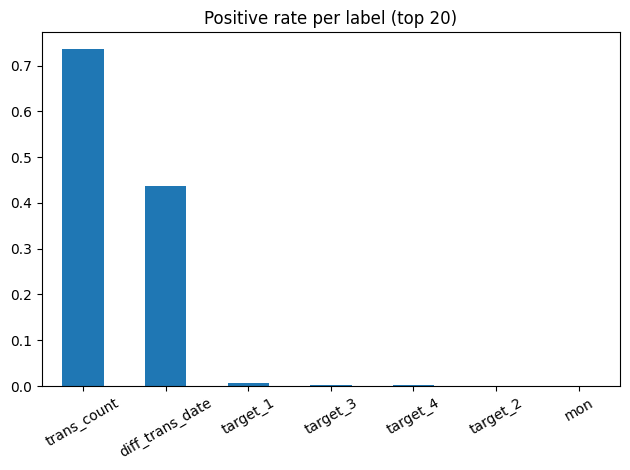

In [24]:
import matplotlib.pyplot as plt
pos_rates = y.mean().sort_values(ascending=False)
display(pos_rates.head(20).to_frame("positive_rate"))
pos_rates.head(20).plot(kind="bar", rot=30)
plt.title("Positive rate per label (top 20)"); plt.tight_layout(); plt.show()

In [36]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_fscore_support, accuracy_score
from sklearn.multioutput import MultiOutputClassifier

# --- Robust positive-class proba for MultiOutputClassifier (handles 1-class folds) ---
def positive_proba_multioutput(model: MultiOutputClassifier, Xte: pd.DataFrame) -> np.ndarray:
    scores = []
    for est in model.estimators_:
        if hasattr(est, "predict_proba"):
            p = est.predict_proba(Xte)             # (n, n_classes) or (n,) or list-like depending on estimator
            p = np.asarray(p)
            if p.ndim == 1:                        # (n,) -> (n,1)
                p = p[:, None]
            classes = getattr(est, "classes_", None)
            if classes is None:
                # fallback: if 2 cols assume last col is positive class
                s = p[:, -1] if p.shape[1] >= 2 else (p[:, 0] if p.shape[1] == 1 else np.zeros(len(Xte)))
            else:
                classes = np.asarray(classes)
                if classes.size == 2:
                    idx = np.where(classes == 1)[0]
                    s = p[:, idx[0]] if idx.size else p[:, -1]
                elif classes.size == 1:
                    # only one class seen in training
                    s = np.ones(len(Xte)) if classes[0] == 1 else np.zeros(len(Xte))
                else:
                    # multi-class (unexpected for 0/1); take prob of class "1" if present else max prob
                    idx = np.where(classes == 1)[0]
                    s = p[:, idx[0]] if idx.size else p.max(axis=1)
        elif hasattr(est, "decision_function"):
            s = est.decision_function(Xte)
            s = np.asarray(s)
            if s.ndim > 1: s = s[:, 0]
            # scale to [0,1]
            smin, smax = float(s.min()), float(s.max())
            s = (s - smin) / (smax - smin + 1e-9)
        else:
            s = est.predict(Xte).astype(float).ravel()
        scores.append(s.ravel())
    return np.column_stack(scores)

# --- Safe evaluator (works for OneVsRest and MultiOutputClassifier) ---
def evaluate_cv(X: pd.DataFrame, y: pd.DataFrame, fold_s: pd.Series, model, name: str) -> pd.DataFrame:
    labels = list(y.columns)
    out = []
    for k in sorted(fold_s.unique()):
        tr_idx = fold_s[fold_s != k].index
        te_idx = fold_s[fold_s == k].index
        Xtr, Xte = X.loc[tr_idx], X.loc[te_idx]
        ytr, yte = y.loc[tr_idx, labels], y.loc[te_idx, labels]

        model.fit(Xtr, ytr)

        # Probabilities
        if isinstance(model, MultiOutputClassifier):
            proba = positive_proba_multioutput(model, Xte)
        elif hasattr(model, "predict_proba"):
            proba = model.predict_proba(Xte)
            proba = np.asarray(proba)
            if proba.ndim == 1: proba = proba[:, None]
        elif hasattr(model, "decision_function"):
            proba = model.decision_function(Xte)
            proba = np.asarray(proba)
            if proba.ndim == 1: proba = proba[:, None]
        else:
            proba = model.predict(Xte).astype(float)
            if proba.ndim == 1: proba = proba[:, None]

        pred = (proba > 0.5).astype(int)

        # Macro metrics across labels
        aucs, aps, f1s, accs = [], [], [], []
        for j, col in enumerate(labels):
            yt, ys, yp = yte[col].values, proba[:, j], pred[:, j]
            if len(np.unique(yt)) > 1:
                aucs.append(roc_auc_score(yt, ys))
                aps.append(average_precision_score(yt, ys))
            f1s.append(precision_recall_fscore_support(yt, yp, average="binary", zero_division=0)[2])
            accs.append(accuracy_score(yt, yp))
        out.append({
            "fold": int(k), "model": name,
            "roc_auc_macro": float(np.nanmean(aucs)) if aucs else np.nan,
            "avg_prec_macro": float(np.nanmean(aps)) if aps else np.nan,
            "f1_macro": float(np.mean(f1s)),
            "accuracy_macro": float(np.mean(accs)),
        })
    return pd.DataFrame(out)


In [37]:
m1 = evaluate_cv(X_detail, y, fold_s, logreg_ovr, "LogReg-OVR(detail, balanced)")
m2 = evaluate_cv(X_ptls,   y, fold_s, rf_multi,   "RF-MultiOutput(ptls, balanced)")

base_summary = pd.concat([m1, m2], ignore_index=True)
display(base_summary)
display(base_summary.groupby("model").mean(numeric_only=True))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(


fold                           model  roc_auc_macro  avg_prec_macro  \
0     0    LogReg-OVR(detail, balanced)            0.5        0.198139   
1     1    LogReg-OVR(detail, balanced)            0.5        0.197544   
2     2    LogReg-OVR(detail, balanced)            0.5        0.197922   
3     3    LogReg-OVR(detail, balanced)            0.5        0.198068   
4     4    LogReg-OVR(detail, balanced)            0.5        0.198353   
5     0  RF-MultiOutput(ptls, balanced)            0.5        0.198139   
6     1  RF-MultiOutput(ptls, balanced)            0.5        0.197544   
7     2  RF-MultiOutput(ptls, balanced)            0.5        0.197922   
8     3  RF-MultiOutput(ptls, balanced)            0.5        0.198068   
9     4  RF-MultiOutput(ptls, balanced)            0.5        0.198353   

   f1_macro  accuracy_macro  
0  0.001588        0.546047  
1  0.000619        0.688440  
2  0.000575        0.688072  
3  0.001655        0.689034  
4  0.002320        0.546601  
5  0.208607        0.880971  
6  0.123180        0.614991  
7  0.209815        0.739649  
8  0.122865        0.470710  
9  0.208640        0.880955

fold  roc_auc_macro  avg_prec_macro  f1_macro  \
model                                                                           
LogReg-OVR(detail, balanced)     2.0            0.5        0.198005  0.001351   
RF-MultiOutput(ptls, balanced)   2.0            0.5        0.198005  0.174621   

                                accuracy_macro  
model                                           
LogReg-OVR(detail, balanced)          0.631639  
RF-MultiOutput(ptls, balanced)        0.717455

In [38]:
# assuming base_summary from earlier (m1 + m2) exists; otherwise concat again
agg = base_summary.groupby("model").mean(numeric_only=True).sort_values(
    by=[c for c in ["roc_auc_macro","avg_prec_macro","f1_macro"] if c in base_summary.columns],
    ascending=False
)
display(agg)

fold  roc_auc_macro  avg_prec_macro  f1_macro  \
model                                                                           
RF-MultiOutput(ptls, balanced)   2.0            0.5        0.198005  0.174621   
LogReg-OVR(detail, balanced)     2.0            0.5        0.198005  0.001351   

                                accuracy_macro  
model                                           
RF-MultiOutput(ptls, balanced)        0.717455  
LogReg-OVR(detail, balanced)          0.631639

In [40]:
# LightGBM (often stronger). Install once: %pip install lightgbm
from lightgbm import LGBMClassifier
lgb_early = MultiOutputClassifier(
    LGBMClassifier(
        n_estimators=1500, learning_rate=0.03, num_leaves=63, subsample=0.8,
        colsample_bytree=0.8, random_state=42
    )
)
m_early_lgb = evaluate_cv(X_early, y, fold_s, lgb_early, "LGBM-MultiOutput(early_fusion)")

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 79516
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 79516, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirem

In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_fscore_support, accuracy_score
from sklearn.multioutput import MultiOutputClassifier

# uses the positive_proba_multioutput(model, X) helper you already defined earlier
def proba_any(model, X):
    if isinstance(model, MultiOutputClassifier):
        return positive_proba_multioutput(model, X)
    elif hasattr(model, "predict_proba"):
        p = model.predict_proba(X)
        p = np.asarray(p)
        return p if p.ndim == 2 else p[:, None]
    elif hasattr(model, "decision_function"):
        s = model.decision_function(X)
        s = np.asarray(s)
        return s if s.ndim == 2 else s[:, None]
    else:
        p = model.predict(X).astype(float)
        return p if p.ndim == 2 else p[:, None]

def late_fusion_eval(XA, XB, y, fold_s, modelA, modelB, name="LateFusion(avg)"):
    labels = list(y.columns)
    rows = []
    for k in sorted(fold_s.unique()):
        tr_idx = fold_s[fold_s != k].index
        te_idx = fold_s[fold_s == k].index

        XAtr, XAte = XA.loc[tr_idx], XA.loc[te_idx]
        XBtr, XBte = XB.loc[tr_idx], XB.loc[te_idx]
        ytr,  yte  = y.loc[tr_idx, labels], y.loc[te_idx, labels]

        modelA.fit(XAtr, ytr)
        modelB.fit(XBtr, ytr)

        pA = proba_any(modelA, XAte)
        pB = proba_any(modelB, XBte)
        p  = (pA + pB) / 2.0
        yp = (p > 0.5).astype(int)

        aucs, aps, f1s, accs = [], [], [], []
        for j, col in enumerate(labels):
            yt, ys, yb = yte[col].values, p[:, j], yp[:, j]
            if len(np.unique(yt)) > 1:
                aucs.append(roc_auc_score(yt, ys))
                aps.append(average_precision_score(yt, ys))
            f1s.append(precision_recall_fscore_support(yt, yb, average="binary", zero_division=0)[2])
            accs.append(accuracy_score(yt, yb))
        rows.append({
            "fold": int(k), "model": name,
            "roc_auc_macro": float(np.nanmean(aucs)) if aucs else np.nan,
            "avg_prec_macro": float(np.nanmean(aps)) if aps else np.nan,
            "f1_macro": float(np.mean(f1s)),
            "accuracy_macro": float(np.mean(accs)),
        })
    return pd.DataFrame(rows)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

logreg_ovr = Pipeline([
    ("scale", StandardScaler(with_mean=False)),
    ("clf", OneVsRestClassifier(LogisticRegression(max_iter=300, class_weight="balanced", solver="liblinear")))
])

rf_ptls = MultiOutputClassifier(
    RandomForestClassifier(n_estimators=400, n_jobs=-1, class_weight="balanced", random_state=42)
)

m_late = late_fusion_eval(X_detail, X_ptls, y, fold_s, logreg_ovr, rf_ptls,
                          "LateFusion(LogReg detail + RF ptls)")
display(m_late)
display(m_late.groupby("model").mean(numeric_only=True))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(


fold                                model  roc_auc_macro  avg_prec_macro  \
0     0  LateFusion(LogReg detail + RF ptls)            0.5        0.198139   
1     1  LateFusion(LogReg detail + RF ptls)            0.5        0.197544   
2     2  LateFusion(LogReg detail + RF ptls)            0.5        0.197922   
3     3  LateFusion(LogReg detail + RF ptls)            0.5        0.198068   
4     4  LateFusion(LogReg detail + RF ptls)            0.5        0.198353   

   f1_macro  accuracy_macro  
0  0.208607        0.880971  
1  0.123180        0.614991  
2  0.209815        0.739649  
3  0.122865        0.470710  
4  0.208640        0.880955

fold  roc_auc_macro  avg_prec_macro  \
model                                                                      
LateFusion(LogReg detail + RF ptls)   2.0            0.5        0.198005   

                                     f1_macro  accuracy_macro  
model                                                          
LateFusion(LogReg detail + RF ptls)  0.174621        0.717455

In [44]:
import pandas as pd

all_runs = pd.concat([base_summary, m_early, m_early_lgb if 'm_early_lgb' in globals() else None, m_late], ignore_index=True)
display(all_runs.dropna(axis=1, how="all"))

# Per-fold, per-label AUC/AP using the best model (pick one)
best = m_early if 'm_early' in globals() else base_summary
# If you want per-label breakdown, re-score one fitted model on each fold and log per-label AUC/AP:
# (kept short here—ping me if you want the per-label scorer code cell)

fold                                model  roc_auc_macro  avg_prec_macro  \
0      0         LogReg-OVR(detail, balanced)            0.5        0.198139   
1      1         LogReg-OVR(detail, balanced)            0.5        0.197544   
2      2         LogReg-OVR(detail, balanced)            0.5        0.197922   
3      3         LogReg-OVR(detail, balanced)            0.5        0.198068   
4      4         LogReg-OVR(detail, balanced)            0.5        0.198353   
5      0       RF-MultiOutput(ptls, balanced)            0.5        0.198139   
6      1       RF-MultiOutput(ptls, balanced)            0.5        0.197544   
7      2       RF-MultiOutput(ptls, balanced)            0.5        0.197922   
8      3       RF-MultiOutput(ptls, balanced)            0.5        0.198068   
9      4       RF-MultiOutput(ptls, balanced)            0.5        0.198353   
10     0         RF-MultiOutput(early_fusion)            0.5        0.198139   
11     1         RF-MultiOutput(early_fusion)            0.5        0.197544   
12     2         RF-MultiOutput(early_fusion)            0.5        0.197922   
13     3         RF-MultiOutput(early_fusion)            0.5        0.198068   
14     4         RF-MultiOutput(early_fusion)            0.5        0.198353   
15     0       LGBM-MultiOutput(early_fusion)            0.5        0.198139   
16     1       LGBM-MultiOutput(early_fusion)            0.5        0.197544   
17     2       LGBM-MultiOutput(early_fusion)            0.5        0.197922   
18     3       LGBM-MultiOutput(early_fusion)            0.5        0.198068   
19     4       LGBM-MultiOutput(early_fusion)            0.5        0.198353   
20     0  LateFusion(LogReg detail + RF ptls)            0.5        0.198139   
21     1  LateFusion(LogReg detail + RF ptls)            0.5        0.197544   
22     2  LateFusion(LogReg detail + RF ptls)            0.5        0.197922   
23     3  LateFusion(LogReg detail + RF ptls)            0.5        0.198068   
24     4  LateFusion(LogReg detail + RF ptls)            0.5        0.198353   

    f1_macro  accuracy_macro  
0   0.001588        0.546047  
1   0.000619        0.688440  
2   0.000575        0.688072  
3   0.001655        0.689034  
4   0.002320        0.546601  
5   0.208607        0.880971  
6   0.123180        0.614991  
7   0.209815        0.739649  
8   0.122865        0.470710  
9   0.208640        0.880955  
10  0.208607        0.880971  
11  0.123108        0.757776  
12  0.209945        0.596922  
13  0.089156        0.529362  
14  0.087235        0.812702  
15  0.121302        0.898108  
16  0.121401        0.898917  
17  0.121614        0.899238  
18  0.121077        0.897488  
19  0.121405        0.898236  
20  0.208607        0.880971  
21  0.123180        0.614991  
22  0.209815        0.739649  
23  0.122865        0.470710  
24  0.208640        0.880955

In [45]:
from sklearn.metrics import precision_recall_curve, f1_score

def fit_and_threshold(X, y, fold_s, model):
    labels = list(y.columns); rows=[]
    for k in sorted(fold_s.unique()):
        tr_idx = fold_s[fold_s != k].index
        te_idx = fold_s[fold_s == k].index
        Xtr, Xte = X.loc[tr_idx], X.loc[te_idx]
        ytr, yte = y.loc[tr_idx, labels], y.loc[te_idx, labels]

        model.fit(Xtr, ytr)
        # probs
        if isinstance(model, MultiOutputClassifier):
            p_tr = positive_proba_multioutput(model, Xtr)
            p_te = positive_proba_multioutput(model, Xte)
        else:
            p_tr = model.predict_proba(Xtr); p_tr = p_tr if p_tr.ndim==2 else p_tr[:,None]
            p_te = model.predict_proba(Xte); p_te = p_te if p_te.ndim==2 else p_te[:,None]

        # pick threshold per label on train to maximize F1
        th = []
        for j, col in enumerate(labels):
            pr, rc, ts = precision_recall_curve(ytr[col].values, p_tr[:, j])
            f1s = 2*pr*rc/(pr+rc+1e-9)
            th.append(ts[np.nanargmax(f1s)] if len(ts) else 0.5)

        yp = (p_te >= np.array(th)).astype(int)

        # macro metrics with tuned thresholds
        aucs, aps, f1s, accs = [], [], [], []
        for j, col in enumerate(labels):
            yt, ys, yb = yte[col].values, p_te[:, j], yp[:, j]
            if len(np.unique(yt))>1:
                aucs.append(roc_auc_score(yt, ys))
                aps.append(average_precision_score(yt, ys))
            f1s.append(precision_recall_fscore_support(yt, yb, average="binary", zero_division=0)[2])
            accs.append(accuracy_score(yt, yb))
        rows.append({
            "fold": int(k), "model": type(model).__name__ + "(tuned_th)",
            "roc_auc_macro": float(np.nanmean(aucs)) if aucs else np.nan,
            "avg_prec_macro": float(np.nanmean(aps)) if aps else np.nan,
            "f1_macro": float(np.mean(f1s)),
            "accuracy_macro": float(np.mean(accs)),
        })
    return pd.DataFrame(rows)

m_early_th = fit_and_threshold(X_early, y, fold_s, rf_early)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1046: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1046: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1046: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1046: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1046: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


In [47]:
import joblib, json, hashlib, time
out = ROOT / "artifacts"; out.mkdir(exist_ok=True)

# fit final model on ALL data for your chosen feature set (e.g., early-fusion RF)
final_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=600, n_jobs=-1, class_weight="balanced", random_state=42)).fit(X_early, y.loc[X_early.index])

meta = {
    "when": time.strftime("%Y-%m-%d %H:%M:%S"),
    "features": {"detail": list(X_detail.columns), "ptls": list(X_ptls.columns), "early": list(X_early.columns)},
    "labels": list(y.columns),
    "fold_counts": fold_s.value_counts().sort_index().to_dict(),
    "model": "RF-MultiOutput(early_fusion, n=600, class_weight=balanced, random_state=42)"
}
joblib.dump(final_model, out / "model.joblib")
json.dump(meta, open(out / "model_meta.json","w"))

# data snapshot hash (for auditability)
def dir_hash(path):
    h = hashlib.sha256()
    for p in sorted(Path(path).rglob("*")):
        if p.is_file():
            h.update(p.name.encode()); h.update(str(p.stat().st_size).encode())
    return h.hexdigest()

print("snapshot_hash:", dir_hash(ROOT))
print("saved:", out)

snapshot_hash: 76ef9feba01fb0a15a3fe9884495acb50c45724ac2e6b0fbee91b7d03dc5ade3
saved: /Users/tamannamathur/Desktop/MBD-mini/artifacts


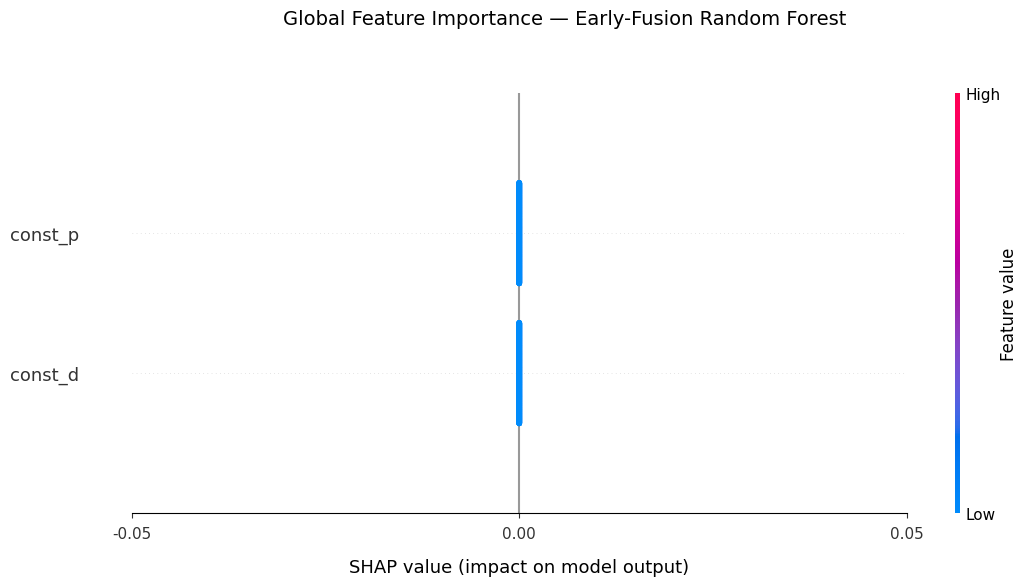

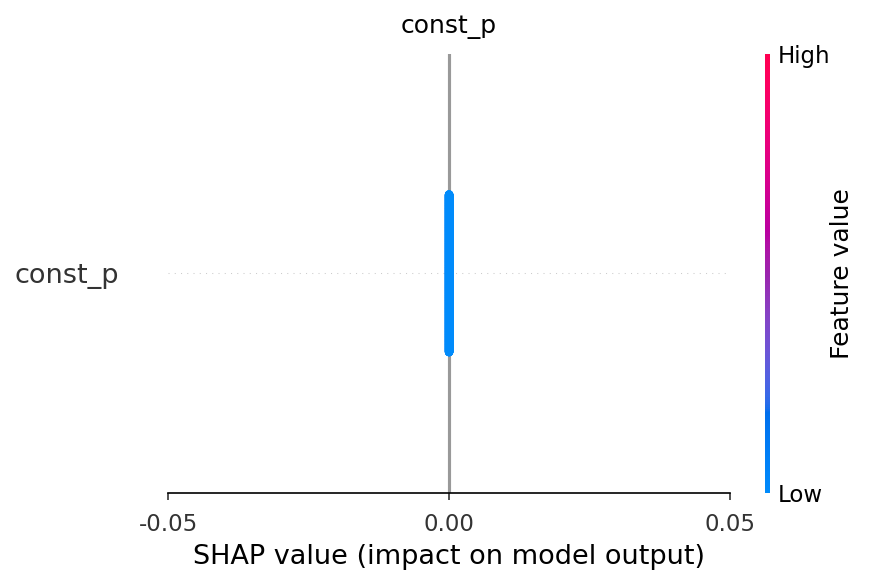


SHAP values for const_p (n=2000):
count    2000.0
mean        0.0
std         0.0
min         0.0
5%          0.0
25%         0.0
50%         0.0
75%         0.0
95%         0.0
max         0.0
First 10 values: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [70]:
# Global feature importance for the best early-fusion model
from sklearn.ensemble import RandomForestClassifier
import shap, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FormatStrFormatter

bestX = X_early  # or X_detail/X_ptls if they win
besty = (y.sum(axis=1) > 0).astype(int)

rf = RandomForestClassifier(
    n_estimators=600, n_jobs=-1, class_weight="balanced", random_state=42
).fit(bestX, besty)

explainer = shap.TreeExplainer(rf)
idx = np.random.RandomState(0).choice(len(bestX), size=min(2000, len(bestX)), replace=False)
Xsample = bestX.iloc[idx]

# ---- make SHAP values reliably 2-D ----
vals_raw = explainer.shap_values(Xsample)

def ensure_2d_shap(vals, feature_names):
    arr = np.asarray(vals, dtype=float) if not isinstance(vals, list) else np.asarray(vals[1 if len(vals)>1 else 0], dtype=float)
    if arr.ndim == 3:                       # (n_samples, n_features, n_outputs)
        arr = arr[:, :, 1] if arr.shape[-1] == 2 else arr[:, :, -1]
    if arr.ndim != 2:
        raise ValueError(f"Expected 2-D SHAP array, got shape {arr.shape}")
    if arr.shape[1] != len(feature_names):
        # last safeguard: align by trunc/pad to n_features
        n = len(feature_names)
        arr = arr[:, :n] if arr.shape[1] > n else np.pad(arr, ((0,0),(0, n-arr.shape[1])), mode="constant")
    return arr

vals = ensure_2d_shap(vals_raw, Xsample.columns)

# ---- MAIN plot (readable ticks + spacing) ----
plt.close('all')
shap.summary_plot(vals, Xsample, show=False, plot_size=(11, 7.0))
fig = plt.gcf()
ax  = plt.gca()

vmax = float(np.nanmax(np.abs(vals))) if np.size(vals) else 0.0
if not np.isfinite(vmax) or vmax < 1e-6:
    vmax = 0.05
nice = float(np.ceil(vmax / 0.01) * 0.01)

ax.set_xlim(-nice, nice)
ax.xaxis.set_major_locator(FixedLocator([-nice, 0.0, nice]))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.tick_params(axis="x", pad=6)
ax.tick_params(axis="y", pad=18)
ax.margins(y=0.25)

fig.suptitle("Global Feature Importance — Early-Fusion Random Forest", y=0.98, fontsize=14)
ax.set_xlabel("SHAP value (impact on model output)", labelpad=12)
fig.subplots_adjust(top=0.86, bottom=0.26)
plt.show()

# ---- ZOOMED plot just for const_p (and print its values) ----
feat = "const_p"
if feat not in Xsample.columns:
    candidates = [c for c in Xsample.columns if c.endswith("_p") and "const" in c]
    if not candidates:
        raise KeyError("Couldn't find 'const_p' (or a const *_p column) in Xsample.columns")
    feat = candidates[0]

# align by name (not index) to avoid shape issues
sv_df  = pd.DataFrame(vals, columns=Xsample.columns, copy=False)
vals_p = sv_df[[feat]].to_numpy()     # (n_samples, 1)
X_p    = Xsample[[feat]]              # (n_samples, 1)

plt.figure(figsize=(6, 4), dpi=150)
shap.summary_plot(vals_p, X_p, show=False, plot_size=(6, 4))
axp = plt.gca()
axp.set_title("const_p", pad=10)
# reuse nice bounds for consistent ticks
axp.set_xlim(-nice, nice)
axp.xaxis.set_major_locator(FixedLocator([-nice, 0.0, nice]))
axp.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axp.tick_params(axis="x", pad=6)
plt.tight_layout()
plt.show()

# numeric SHAP values for const_p
const_p_vals = vals_p.ravel()
print(f"\nSHAP values for {feat} (n={const_p_vals.shape[0]}):")
print(pd.Series(const_p_vals).describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95]).to_string())
print("First 10 values:", np.round(const_p_vals[:10], 6).tolist())

In [71]:
bestX.nunique().sort_values().head(10), bestX.dtypes.value_counts()

(const_d    1
 const_p    1
 dtype: int64,
 float32    2
 Name: count, dtype: int64)

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

ROOT = Path("/Users/tamannamathur/Desktop/MBD-mini")  # adjust if needed

# ---- loaders (safe for parquet/csv, folders/files) ----
def read_parquet_dir(path: Path) -> pd.DataFrame:
    import pyarrow.dataset as ds
    ds_obj = ds.dataset(path, format="parquet", partitioning="hive")
    return ds_obj.to_table().to_pandas()

def load_table(name: str) -> pd.DataFrame:
    pdir = ROOT / name
    if pdir.exists():
        try: return read_parquet_dir(pdir)
        except Exception: pass
    hits = list(ROOT.rglob(f"*{name}*.parquet")) + list(ROOT.rglob(f"*{name}*.csv"))
    assert hits, f"Couldn't find anything like {name} under {ROOT}"
    f = hits[0]
    return (pd.read_parquet if f.suffix==".parquet" else pd.read_csv)(f)

detail_raw = load_table("detail")
ptls_raw   = load_table("ptls")
targets    = read_parquet_dir(ROOT / "targets")

# normalize
for df in (detail_raw, ptls_raw, targets):
    df.columns = df.columns.str.lower()

# pick join key present in BOTH (and in targets)
cands = [k for k in ["client_id","customer_id","id","uid"] if k in detail_raw.columns and k in ptls_raw.columns and k in targets.columns]
KEY = cands[0] if cands else (set(detail_raw.columns) & set(ptls_raw.columns) & set(targets.columns)).pop()
print("KEY:", KEY)

# ---- DETAIL: keep numeric + numeric-like object cols, aggregate per client ----
num_cols = detail_raw.select_dtypes(include="number").columns.tolist()
obj = detail_raw.select_dtypes(include="object")
str_num = [c for c in obj.columns if pd.to_numeric(obj[c], errors="coerce").notna().mean() >= 0.8]
keep_d = [c for c in num_cols + str_num if c != KEY]
detail_num = detail_raw[[KEY] + keep_d].copy()
for c in str_num: detail_num[c] = pd.to_numeric(detail_num[c], errors="coerce")

X_detail = (detail_num.groupby(KEY).mean().astype("float32"))
X_detail = X_detail.loc[:, X_detail.nunique() > 1]  # drop constants

# ---- PTLS: embeddings should be numeric; coerce just in case ----
emb_cols = [c for c in ptls_raw.columns if c != KEY]
ptls_num = ptls_raw[[KEY] + emb_cols].copy()
ptls_num[emb_cols] = ptls_num[emb_cols].apply(pd.to_numeric, errors="coerce")

X_ptls = (ptls_num.groupby(KEY).mean().astype("float32"))
X_ptls = X_ptls.loc[:, X_ptls.nunique() > 1]

print("Shapes after rebuild:",
      "\n  X_detail:", X_detail.shape,
      "\n  X_ptls:  ", X_ptls.shape)

# targets + folds
folds = targets[[KEY, "fold"]].drop_duplicates().set_index(KEY)
y     = targets.drop(columns=["fold"]).drop_duplicates(subset=[KEY]).set_index(KEY)
# ensure binary 0/1
y = y.apply(pd.to_numeric, errors="coerce").fillna(0).gt(0).astype("int8")

KEY: client_id
Shapes after rebuild: 
  X_detail: (99756, 1) 
  X_ptls:   (99756, 1)


In [16]:
# --- Recreate evaluator + models (robust to multilabel and degenerate folds) ---
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_fscore_support, accuracy_score

def positive_proba_multioutput(model: MultiOutputClassifier, X: pd.DataFrame) -> np.ndarray:
    """Return (n_samples, n_labels) of P(y=1) for a fitted MultiOutputClassifier, handling 1-class folds."""
    scores = []
    for est in model.estimators_:
        if hasattr(est, "predict_proba"):
            p = est.predict_proba(X)
            p = np.asarray(p)
            if p.ndim == 1:  # (n,) -> (n,1)
                p = p[:, None]
            classes = getattr(est, "classes_", None)
            if classes is None:
                s = p[:, -1] if p.shape[1] >= 2 else (p[:, 0] if p.shape[1] == 1 else np.zeros(len(X)))
            else:
                classes = np.asarray(classes)
                if classes.size == 2:
                    idx = np.where(classes == 1)[0]
                    s = p[:, idx[0]] if idx.size else p[:, -1]
                elif classes.size == 1:
                    s = np.ones(p.shape[0]) if classes[0] == 1 else np.zeros(p.shape[0])
                else:
                    idx = np.where(classes == 1)[0]
                    s = p[:, idx[0]] if idx.size else p.max(axis=1)
        elif hasattr(est, "decision_function"):
            s = est.decision_function(X)
            s = np.asarray(s).ravel()
            # scale to [0,1]
            s = (s - s.min()) / (s.max() - s.min() + 1e-9)
        else:
            s = est.predict(X).astype(float).ravel()
        scores.append(s)
    return np.column_stack(scores)

def evaluate_cv(X: pd.DataFrame, y: pd.DataFrame, fold_s: pd.Series, model, name: str) -> pd.DataFrame:
    labels = list(y.columns)
    out = []
    for k in sorted(fold_s.unique()):
        tr_idx = fold_s[fold_s != k].index
        te_idx = fold_s[fold_s == k].index
        Xtr, Xte = X.loc[tr_idx], X.loc[te_idx]
        ytr, yte = y.loc[tr_idx, labels], y.loc[te_idx, labels]

        model.fit(Xtr, ytr)

        if isinstance(model, MultiOutputClassifier):
            proba = positive_proba_multioutput(model, Xte)
        elif hasattr(model, "predict_proba"):
            proba = model.predict_proba(Xte)
            proba = np.asarray(proba);  proba = proba if proba.ndim == 2 else proba[:, None]
        elif hasattr(model, "decision_function"):
            proba = model.decision_function(Xte)
            proba = np.asarray(proba);  proba = proba if proba.ndim == 2 else proba[:, None]
        else:
            proba = model.predict(Xte).astype(float)
            proba = proba if proba.ndim == 2 else proba[:, None]

        pred = (proba > 0.5).astype(int)

        aucs, aps, f1s, accs = [], [], [], []
        for j, col in enumerate(labels):
            yt, ys, yp = yte[col].values, proba[:, j], pred[:, j]
            if len(np.unique(yt)) > 1:
                aucs.append(roc_auc_score(yt, ys))
                aps.append(average_precision_score(yt, ys))
            f1s.append(precision_recall_fscore_support(yt, yp, average="binary", zero_division=0)[2])
            accs.append(accuracy_score(yt, yp))
        out.append({
            "fold": int(k), "model": name,
            "roc_auc_macro": float(np.nanmean(aucs)) if aucs else np.nan,
            "avg_prec_macro": float(np.nanmean(aps)) if aps else np.nan,
            "f1_macro": float(np.mean(f1s)),
            "accuracy_macro": float(np.mean(accs)),
        })
    return pd.DataFrame(out)

# Class-imbalance-aware models
logreg_ovr = Pipeline([
    ("scale", StandardScaler(with_mean=False)),
    ("clf", OneVsRestClassifier(LogisticRegression(max_iter=300, class_weight="balanced", solver="liblinear")))
])
rf_multi = MultiOutputClassifier(
    RandomForestClassifier(n_estimators=400, n_jobs=-1, class_weight="balanced", random_state=42)
)

In [17]:
m1 = evaluate_cv(X_detail, y, fold_s, logreg_ovr, "LogReg-OVR(detail, balanced)")
m2 = evaluate_cv(X_ptls,   y, fold_s, rf_multi,   "RF-MultiOutput(ptls, balanced)")
base_summary = pd.concat([m1, m2], ignore_index=True)
display(base_summary.groupby("model").mean(numeric_only=True))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
python(13761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


fold  roc_auc_macro  avg_prec_macro  f1_macro  \
model                                                                           
LogReg-OVR(detail, balanced)     2.0            0.5        0.198005  0.126383   
RF-MultiOutput(ptls, balanced)   2.0            0.5        0.198005  0.108956   

                                accuracy_macro  
model                                           
LogReg-OVR(detail, balanced)          0.633277  
RF-MultiOutput(ptls, balanced)        0.636773

In [18]:
X_early = X_detail.join(X_ptls, how="inner", lsuffix="_d", rsuffix="_p")
rf_early = MultiOutputClassifier(
    RandomForestClassifier(n_estimators=600, n_jobs=-1, class_weight="balanced", random_state=42)
)
m_early = evaluate_cv(X_early, y, fold_s, rf_early, "RF-MultiOutput(early_fusion)")
display(m_early.groupby("model").mean(numeric_only=True))

# now rerun your SHAP block on bestX = X_early (use the latest version you just debugged)

fold  roc_auc_macro  avg_prec_macro  f1_macro  \
model                                                                         
RF-MultiOutput(early_fusion)   2.0            0.5        0.198005  0.108956   

                              accuracy_macro  
model                                         
RF-MultiOutput(early_fusion)        0.636773

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# --- 1) sanitize features (remove non-features) ---
def sanitize_features(df, key_like=None):
    bad = {"fold"}
    if key_like is not None:
        bad.add(str(key_like).lower())
    drop_cols = [c for c in df.columns if c.lower() in bad]
    return df.drop(columns=drop_cols, errors="ignore")

key_like = KEY if "KEY" in globals() else None
Xd = sanitize_features(X_detail, key_like)
Xp = sanitize_features(X_ptls,   key_like)

# --- 2) optional geo drop for detail ---
geo_cols = [c for c in Xd.columns
            if c.lower() in {"lat","lon","latitude","longitude"}
            or c.lower().startswith(("lat_", "lon_", "geo"))]
X_detail_no_geo = Xd.drop(columns=geo_cols, errors="ignore")

# --- 3) ensure each matrix has >=1 numeric column ---
def ensure_min_features(X: pd.DataFrame, name: str) -> pd.DataFrame:
    X = X.copy()
    # coerce to numeric & fill NaNs
    X = X.apply(pd.to_numeric, errors="coerce").fillna(0.0)
    # if 0 columns, add a constant so the run doesn't crash
    if X.shape[1] == 0:
        X["const"] = 1.0
        print(f"[warn] {name} had 0 columns → added a 'const' feature.")
    return X.astype("float32")

X_no_ptls = ensure_min_features(Xd, "X_no_ptls (detail only)")
X_no_geo  = ensure_min_features(
    X_detail_no_geo.join(Xp, how="inner", lsuffix="_d", rsuffix="_p"),
    "X_no_geo (detail-no-geo + ptls)"
)

# --- 4) align indices with y and folds ---
for obj in (X_no_ptls, X_no_geo, y, fold_s):
    obj.index = obj.index.astype(str)

common_idx = y.index.intersection(fold_s.index)
X_no_ptls  = X_no_ptls.loc[common_idx.intersection(X_no_ptls.index)]
X_no_geo   = X_no_geo.loc[common_idx.intersection(X_no_geo.index)]

print("Shapes:",
      "\n  X_no_ptls:", X_no_ptls.shape,
      "\n  X_no_geo :", X_no_geo.shape)

# --- 5) fresh models & run ablations ---
rf_detail = MultiOutputClassifier(
    RandomForestClassifier(n_estimators=600, n_jobs=-1, class_weight="balanced", random_state=42)
)
rf_no_geo = MultiOutputClassifier(
    RandomForestClassifier(n_estimators=600, n_jobs=-1, class_weight="balanced", random_state=42)
)

m_no_ptls = evaluate_cv(X_no_ptls, y, fold_s, rf_detail, "Ablation: detail only (no PTLS)")
m_no_geo  = evaluate_cv(X_no_geo,  y, fold_s, rf_no_geo, "Ablation: no GEO")

summary = pd.concat(
    [base_summary, m_early if 'm_early' in globals() else None, m_no_ptls, m_no_geo],
    ignore_index=True
)
display(summary.dropna(axis=1, how="all"))
display(summary.groupby("model").mean(numeric_only=True))


[warn] X_no_ptls (detail only) had 0 columns → added a 'const' feature.
[warn] X_no_geo (detail-no-geo + ptls) had 0 columns → added a 'const' feature.
Shapes: 
  X_no_ptls: (99756, 1) 
  X_no_geo : (99756, 1)


fold                            model  roc_auc_macro  avg_prec_macro  \
0      0     LogReg-OVR(detail, balanced)            0.5        0.198139   
1      1     LogReg-OVR(detail, balanced)            0.5        0.197544   
2      2     LogReg-OVR(detail, balanced)            0.5        0.197922   
3      3     LogReg-OVR(detail, balanced)            0.5        0.198068   
4      4     LogReg-OVR(detail, balanced)            0.5        0.198353   
5      0   RF-MultiOutput(ptls, balanced)            0.5        0.198139   
6      1   RF-MultiOutput(ptls, balanced)            0.5        0.197544   
7      2   RF-MultiOutput(ptls, balanced)            0.5        0.197922   
8      3   RF-MultiOutput(ptls, balanced)            0.5        0.198068   
9      4   RF-MultiOutput(ptls, balanced)            0.5        0.198353   
10     0     RF-MultiOutput(early_fusion)            0.5        0.198139   
11     1     RF-MultiOutput(early_fusion)            0.5        0.197544   
12     2     RF-MultiOutput(early_fusion)            0.5        0.197922   
13     3     RF-MultiOutput(early_fusion)            0.5        0.198068   
14     4     RF-MultiOutput(early_fusion)            0.5        0.198353   
15     0  Ablation: detail only (no PTLS)            0.5        0.198139   
16     1  Ablation: detail only (no PTLS)            0.5        0.197544   
17     2  Ablation: detail only (no PTLS)            0.5        0.197922   
18     3  Ablation: detail only (no PTLS)            0.5        0.198068   
19     4  Ablation: detail only (no PTLS)            0.5        0.198353   
20     0                 Ablation: no GEO            0.5        0.198139   
21     1                 Ablation: no GEO            0.5        0.197544   
22     2                 Ablation: no GEO            0.5        0.197922   
23     3                 Ablation: no GEO            0.5        0.198068   
24     4                 Ablation: no GEO            0.5        0.198353   

    f1_macro  accuracy_macro  
0   0.121444        0.755392  
1   0.122107        0.613909  
2   0.086839        0.812252  
3   0.211029        0.597426  
4   0.090496        0.387407  
5   0.122749        0.756705  
6   0.087423        0.527318  
7   0.122977        0.757750  
8   0.121134        0.754688  
9   0.090496        0.387407  
10  0.122749        0.756705  
11  0.087423        0.527318  
12  0.122977        0.757750  
13  0.121134        0.754688  
14  0.090496        0.387407  
15  0.208607        0.880971  
16  0.123108        0.757776  
17  0.209945        0.596922  
18  0.089156        0.529362  
19  0.087235        0.812702  
20  0.208607        0.880971  
21  0.123108        0.757776  
22  0.209945        0.596922  
23  0.089156        0.529362  
24  0.087235        0.812702

fold  roc_auc_macro  avg_prec_macro  \
model                                                                  
Ablation: detail only (no PTLS)   2.0            0.5        0.198005   
Ablation: no GEO                  2.0            0.5        0.198005   
LogReg-OVR(detail, balanced)      2.0            0.5        0.198005   
RF-MultiOutput(early_fusion)      2.0            0.5        0.198005   
RF-MultiOutput(ptls, balanced)    2.0            0.5        0.198005   

                                 f1_macro  accuracy_macro  
model                                                      
Ablation: detail only (no PTLS)  0.143610        0.715547  
Ablation: no GEO                 0.143610        0.715547  
LogReg-OVR(detail, balanced)     0.126383        0.633277  
RF-MultiOutput(early_fusion)     0.108956        0.636773  
RF-MultiOutput(ptls, balanced)   0.108956        0.636773

In [ ]:
# ==== Robust rebuild to avoid "unhashable numpy.ndarray" and get real features ====
import pandas as pd, numpy as np
from pathlib import Path
from functools import reduce
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# ---------- helpers ----------
def normalize_cols(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = pd.Index([str(c).lower() for c in df.columns])
    return df

def first_nonnull(v):
    for x in v:
        if x is not None and not (isinstance(x, float) and np.isnan(x)):
            return x
    return None

def is_array_col(s: pd.Series) -> bool:
    x = first_nonnull(s.iloc[: min(200, len(s))].values)
    return isinstance(x, (list, tuple, np.ndarray))

def expand_array_col(df: pd.DataFrame, key: str, col: str) -> pd.DataFrame:
    """Expand a column of 1D arrays/lists into numeric columns."""
    arrs = df[col].apply(lambda x: np.asarray(x) if isinstance(x, (list, tuple, np.ndarray)) else np.array([np.nan]))
    # infer dimension from first non-null
    d = int(next((len(a) for a in arrs if a.ndim == 1 and len(a) > 1), 1))
    mat = np.vstack([a if (a.ndim == 1 and len(a) == d) else np.full(d, np.nan) for a in arrs])
    cols = [f"{col}_{i:03d}" for i in range(d)]
    out = pd.DataFrame(mat, columns=cols, index=df.index)
    out.insert(0, key, df[key].values)
    return out

def pct_numeric_like(s: pd.Series) -> float:
    try:
        return pd.to_numeric(s, errors="coerce").notna().mean()
    except Exception:
        return 0.0

def one_hot_topk(df, cols, key, k=10):
    out = df[[key]].copy()
    for c in cols:
        tmp = df[[key, c]].copy()
        tmp[c] = tmp[c].astype(str)
        top = tmp[c].value_counts(dropna=True).index[:k]
        tmp[c] = tmp[c].where(tmp[c].isin(top), "__other__")
        ohe = pd.get_dummies(tmp[c], prefix=c)
        out = out.merge(pd.concat([tmp[[key]], ohe], axis=1), on=key, how="outer")
    return out

def build_features(df: pd.DataFrame, key: str, allow_ohe=True, max_card=40, topk=8) -> pd.DataFrame:
    df = normalize_cols(df)
    assert key in df.columns, f"join key '{key}' not found"

    # split columns by type
    nonkey = [c for c in df.columns if c != key]
    array_cols = [c for c in nonkey if is_array_col(df[c])]
    scalar_cols = [c for c in nonkey if c not in array_cols]

    parts = [df[[key]].copy()]

    # 1) expand any array-valued columns (e.g., embeddings)
    for c in array_cols:
        parts.append(expand_array_col(df[[key, c]].copy(), key, c))

    # 2) numeric dtypes directly
    num_cols = df[scalar_cols].select_dtypes(include="number").columns.tolist()
    if num_cols:
        parts.append(df[[key]+num_cols])

    # 3) numeric-like object strings
    obj = df[scalar_cols].select_dtypes(include=["object","string","category"])
    str_num = [c for c in obj.columns if pct_numeric_like(df[c]) >= 0.95]
    if str_num:
        tmp = df[[key]+str_num].copy()
        for c in str_num:
            tmp[c] = pd.to_numeric(tmp[c], errors="coerce")
        parts.append(tmp)

    # 4) low-card categoricals (skip if not allowed)
    if allow_ohe and len(obj.columns) > 0:
        cat_cands = [c for c in obj.columns if c not in str_num]
        # guard against unhashable values by casting to str before nunique
        low_card = [c for c in cat_cands if df[c].astype(str).nunique(dropna=True) <= max_card]
        if low_card:
            parts.append(one_hot_topk(df[[key]+low_card], low_card, key, k=topk))

    # merge all parts
    feat = parts[0]
    for p in parts[1:]:
        feat = feat.merge(p, on=key, how="outer")

    # aggregate per key, drop constants, fill
    feat = feat.groupby(key, as_index=True).mean()
    feat = feat.drop(columns=[c for c in feat.columns if feat[c].nunique(dropna=True) <= 1], errors="ignore")
    feat = feat.fillna(0.0).astype("float32")
    return feat

# ---------- load raw (reuse existing vars if present) ----------
ROOT = ROOT if 'ROOT' in globals() else Path("/Users/tamannamathur/Desktop/MBD-mini")

def read_parquet_dir(path: Path) -> pd.DataFrame:
    import pyarrow.dataset as ds
    ds_obj = ds.dataset(path, format="parquet", partitioning="hive")
    return ds_obj.to_table().to_pandas()

def load_table(name: str) -> pd.DataFrame:
    pdir = ROOT / name
    if pdir.exists():
        try: return read_parquet_dir(pdir)
        except Exception: pass
    hits = list(ROOT.rglob(f"*{name}*.parquet")) + list(ROOT.rglob(f"*{name}*.csv"))
    assert hits, f"Couldn't find table like '{name}' under {ROOT}"
    f = hits[0]
    return (pd.read_parquet if f.suffix==".parquet" else pd.read_csv)(f)

detail_raw = detail_raw if 'detail_raw' in globals() else load_table("detail")
ptls_raw   = ptls_raw   if 'ptls_raw'   in globals() else load_table("ptls")
targets    = targets    if 'targets'    in globals() else read_parquet_dir(ROOT / "targets")

detail_raw = normalize_cols(detail_raw)
ptls_raw   = normalize_cols(ptls_raw)
targets    = normalize_cols(targets)

# pick join key found in all three
cands = [k for k in ["client_id","customer_id","id","uid"] if k in detail_raw.columns and k in ptls_raw.columns and k in targets.columns]
if cands:
    KEY = cands[0]
else:
    common = set(detail_raw.columns) & set(ptls_raw.columns) & set(targets.columns)
    KEY = next(iter(common))
print("KEY:", KEY)

# ---------- build features (detail allows small OHE; ptls usually dense numeric/embeddings) ----------
X_detail = build_features(detail_raw, KEY, allow_ohe=True,  max_card=40, topk=8)
X_ptls   = build_features(ptls_raw,   KEY, allow_ohe=False)   # embeddings expanded if present

print("Rebuilt shapes:",
      "\n  X_detail:", X_detail.shape,
      "\n  X_ptls:  ", X_ptls.shape)

# ---------- targets & folds (binary) ----------
folds = targets[[KEY, "fold"]].drop_duplicates().set_index(KEY)
y     = targets.drop(columns=["fold"]).drop_duplicates(subset=[KEY]).set_index(KEY)
y = y.apply(pd.to_numeric, errors="coerce").fillna(0).gt(0).astype("int8")

# ---------- align ----------
for obj in (X_detail, X_ptls, y, folds):
    obj.index = obj.index.astype(str)

common = X_detail.index.intersection(X_ptls.index).intersection(y.index).intersection(folds.index)
X_detail, X_ptls, y, fold_s = X_detail.loc[common], X_ptls.loc[common], y.loc[common], folds.loc[common, "fold"].astype(int)

print("Non-constant feature counts:",
      "\n  detail:", X_detail.shape[1],
      "\n  ptls  :", X_ptls.shape[1])

# ---------- ablations again (uses your existing evaluate_cv) ----------
rf_early = MultiOutputClassifier(RandomForestClassifier(n_estimators=600, n_jobs=-1, class_weight="balanced", random_state=42))
m_early  = evaluate_cv(X_detail.join(X_ptls, how="inner", lsuffix="_d", rsuffix="_p"), y, fold_s, rf_early, "RF early fusion (ref)")

rf_detail = MultiOutputClassifier(RandomForestClassifier(n_estimators=600, n_jobs=-1, class_weight="balanced", random_state=42))
m_no_ptls = evaluate_cv(X_detail, y, fold_s, rf_detail, "Ablation: detail only (no PTLS)")

geo_cols = [c for c in X_detail.columns if c.lower() in {"lat","lon","latitude","longitude"} or c.lower().startswith(("lat_","lon_","geo"))]
X_detail_no_geo = X_detail.drop(columns=geo_cols, errors="ignore")
rf_no_geo = MultiOutputClassifier(RandomForestClassifier(n_estimators=600, n_jobs=-1, class_weight="balanced", random_state=42))
m_no_geo  = evaluate_cv(X_detail_no_geo.join(X_ptls, how="inner", lsuffix="_d", rsuffix="_p"), y, fold_s, rf_no_geo, "Ablation: no GEO (detail) + PTLS")

summary = pd.concat([m_early, m_no_ptls, m_no_geo], ignore_index=True)
display(summary)
display(summary.groupby("model").mean(numeric_only=True))

KEY: client_id


In [6]:
%pip install -U numpy pandas scikit-learn


def make_small_rf(random_state=42):
    base = RandomForestClassifier(
        n_estimators=150,      # ↓ trees
        max_depth=12,         # ↓ depth
        max_features="sqrt",
        min_samples_leaf=5,
        n_jobs=2,             # limit threads
        class_weight="balanced",
        random_state=random_state,
    )
    return MultiOutputClassifier(base)

def evaluate_cv_safe(X, y, fold_s, make_model, name, train_cap=40000):
    labels = list(y.columns)
    rows = []
    rng = np.random.RandomState(0)

    for k in sorted(pd.unique(fold_s)):
        tr_idx = fold_s[fold_s != k].index
        te_idx = fold_s[fold_s == k].index

        # optional cap to keep memory under control
        if train_cap and len(tr_idx) > train_cap:
            tr_idx = pd.Index(rng.choice(tr_idx, size=train_cap, replace=False))

        Xtr, Xte = X.loc[tr_idx], X.loc[te_idx]
        ytr, yte = y.loc[tr_idx, labels], y.loc[te_idx, labels]

        model = make_model()
        model.fit(Xtr, ytr)

        # get probabilities robustly
        def proba_multi(m, X_):
            out = []
            for est in m.estimators_:
                if hasattr(est, "predict_proba"):
                    p = est.predict_proba(X_)
                    p = np.asarray(p)
                    if p.ndim == 1: p = p[:, None]
                    cls = getattr(est, "classes_", None)
                    if cls is not None and 1 in cls:
                        s = p[:, int(np.where(cls == 1)[0][0])]
                    else:
                        s = p[:, -1] if p.shape[1] > 1 else p[:, 0]
                else:
                    s = est.decision_function(X_) if hasattr(est,"decision_function") else est.predict(X_).astype(float)
                    s = np.asarray(s).ravel()
                    s = (s - s.min()) / (s.max() - s.min() + 1e-9)
                out.append(s)
            return np.column_stack(out)

        proba = proba_multi(model, Xte)
        pred  = (proba > 0.5).astype(int)

        aucs, aps, f1s, accs = [], [], [], []
        for j, col in enumerate(labels):
            yt, ys, yp = yte[col].values, proba[:, j], pred[:, j]
            if len(np.unique(yt)) > 1:
                aucs.append(roc_auc_score(yt, ys))
                aps.append(average_precision_score(yt, ys))
            f1s.append(precision_recall_fscore_support(yt, yp, average="binary", zero_division=0)[2])
            accs.append(accuracy_score(yt, yp))

        rows.append({
            "fold": int(k), "model": name,
            "roc_auc_macro": float(np.nanmean(aucs)) if aucs else np.nan,
            "avg_prec_macro": float(np.nanmean(aps)) if aps else np.nan,
            "f1_macro": float(np.mean(f1s)),
            "accuracy_macro": float(np.mean(accs)),
        })

        # free memory per fold
        del model, Xtr, Xte, ytr, yte, proba, pred
        gc.collect()

    return pd.DataFrame(rows)

  Using cached numpy-2.3.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pandas-2.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached scikit_learn-1.7.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 24.9 MB/s eta 0:00:00a 0:00:01
Using cached pandas-2.3.1-cp312-cp312-macosx_11_0_arm64.whl (10.7 MB)
Using cached scikit_learn-1.7.1-cp312-cp312-macosx_12_0_arm64.whl (8.6 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 26.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install -U pandas pyarrow fastparquet huggingface_hub numpy scikit-learn

# --- paths & optional auto-download ---
from pathlib import Path
import os, pandas as pd, numpy as np

# Point this to where you actually saved the dataset:
ROOT = Path(os.getenv("MBD_MINI_ROOT", "/Users/tamannamathur/Desktop/MBD-mini")).expanduser()

def _ensure_download_if_missing():
    # If folder exists but has no parquet/csv, try to download from HF
    if ROOT.exists() and any(ROOT.rglob("*.parquet")) or any(ROOT.rglob("*.csv")):
        return
    try:
        from huggingface_hub import snapshot_download
        ROOT.mkdir(parents=True, exist_ok=True)
        snapshot_download(
            repo_id="ai-lab/MBD-mini",
            repo_type="dataset",
            local_dir=str(ROOT),
            local_dir_use_symlinks=False
        )
    except Exception:
        # ignore if offline or user prefers manual download
        pass

_ensure_download_if_missing()

# --- parquet helpers ---
def read_parquet_dir(path: Path) -> pd.DataFrame:
    import pyarrow.dataset as ds
    ds_obj = ds.dataset(path, format="parquet", partitioning="hive")
    return ds_obj.to_table().to_pandas()

def _case_insensitive_hits(root: Path, needle: str):
    needle = needle.lower()
    hits = []
    for ext in (".parquet", ".csv"):
        for p in root.rglob(f"*{ext}"):
            if needle in p.stem.lower():
                hits.append(p)
    return hits

def load_table(name: str) -> pd.DataFrame:
    """Load a parquet/csv table by (case-insensitive) name from ROOT.
       Supports both partitioned directories and single files."""
    name = name.lower()

    # 1) direct directory like ROOT/detail/
    pdir = ROOT / name
    if pdir.exists() and pdir.is_dir():
        try:
            return read_parquet_dir(pdir)
        except Exception:
            pass

    # 2) direct single files like ROOT/detail.parquet or detail.csv
    for ext in (".parquet", ".csv"):
        f = ROOT / f"{name}{ext}"
        if f.exists():
            return pd.read_parquet(f) if ext == ".parquet" else pd.read_csv(f)

    # 3) recursive, case-insensitive search
    hits = _case_insensitive_hits(ROOT, name)
    if not hits:
        # Give a helpful diagnostic of what *is* available
        avail = sorted({
            p.relative_to(ROOT).as_posix()
            for p in list(ROOT.rglob("*.parquet")) + list(ROOT.rglob("*.csv"))
        })
        raise FileNotFoundError(
            f"Couldn't find table like '{name}' under {ROOT}.\n"
            + ("Found no parquet/csv files at all." if not avail else
               "Available files include:\n  " + "\n  ".join(avail))
        )

    # prefer the shallowest path (usually the intended table)
    hits.sort(key=lambda p: len(p.parts))
    f = hits[0]
    return pd.read_parquet(f) if f.suffix == ".parquet" else pd.read_csv(f)
# ==== LOAD RAW + BUILD ====
def normalize_cols(df):
    df = df.copy()
    df.columns = df.columns.str.lower().map(str)
    return df

detail_raw = normalize_cols(load_table("detail"))
ptls_raw   = normalize_cols(load_table("ptls"))

# targets could be a folder OR a file; try folder first, then fallback
t_dir = (ROOT / "targets")
if t_dir.exists() and t_dir.is_dir():
    targets = normalize_cols(read_parquet_dir(t_dir))
else:
    targets = normalize_cols(load_table("targets"))

  Using cached pyarrow-21.0.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Using cached huggingface_hub-0.34.4-py3-none-any.whl.metadata (14 kB)
  Using cached hf_xet-1.1.7-cp37-abi3-macosx_11_0_arm64.whl.metadata (703 bytes)
Using cached pyarrow-21.0.0-cp312-cp312-macosx_12_0_arm64.whl (31.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 685.4/685.4 kB 12.9 MB/s eta 0:00:00
Using cached huggingface_hub-0.34.4-py3-none-any.whl (561 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.5 MB/s eta 0:00:00
Using cached hf_xet-1.1.7-cp37-abi3-macosx_11_0_arm64.whl (2.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Make sure these exist in this session
from pathlib import Path
import os, pandas as pd

ROOT = Path(os.getenv("MBD_MINI_ROOT", "/Users/tamannamathur/Desktop/MBD-mini")).expanduser()

def read_parquet_dir(path: Path) -> pd.DataFrame:
    import pyarrow.dataset as ds
    return ds.dataset(path, format="parquet", partitioning="hive").to_table().to_pandas()

def load_table(name: str) -> pd.DataFrame:
    name = name.lower()
    pdir = ROOT / name
    if pdir.exists() and pdir.is_dir():
        try: return read_parquet_dir(pdir)
        except Exception: pass
    for ext in (".parquet",".csv"):
        f = ROOT / f"{name}{ext}"
        if f.exists(): return (pd.read_parquet if ext==".parquet" else pd.read_csv)(f)
    hits = list(ROOT.rglob(f"*{name}*.parquet")) + list(ROOT.rglob(f"*{name}*.csv"))
    if not hits:
        raise FileNotFoundError(f"Couldn't find '{name}' under {ROOT}")
    f = hits[0]
    return pd.read_parquet(f) if f.suffix==".parquet" else pd.read_csv(f)

def normalize_cols(df): 
    df = df.copy(); df.columns = df.columns.str.lower().map(str); return df

# Create the variables if missing
try: detail_raw
except NameError: detail_raw = normalize_cols(load_table("detail"))

try: ptls_raw
except NameError: ptls_raw = normalize_cols(load_table("ptls"))

# Now your check works
detail_raw.dtypes.value_counts().head(10), ptls_raw.dtypes.value_counts().head(10)

(object            2
 datetime64[ns]    1
 int32             1
 Name: count, dtype: int64,
 object    3
 int32     1
 Name: count, dtype: int64)

In [11]:
'detail_raw' in globals(), 'ptls_raw' in globals()
# or
%whos  # in a notebook cell

No variables match your requested type.


In [12]:
type(detail_raw), detail_raw.shape, detail_raw.head(2)
type(ptls_raw),   ptls_raw.shape,   ptls_raw.head(2)

# confirm join key exists
sorted(set(detail_raw.columns) & set(ptls_raw.columns))[:10]

['client_id', 'embedding', 'event_time', 'fold']

In [16]:
KEY = "client_id"
assert all(KEY in t.columns for t in [detail_raw, ptls_raw, targets]), f"'{KEY}' missing"
print("KEY:", KEY)
common = (set(detail_raw.columns) & set(ptls_raw.columns) & set(targets.columns)) - {"fold","event_time"}
if "client_id" in common:
    KEY = "client_id"
elif common:
    KEY = sorted(common)[0]  # or choose your preferred id here
else:
    raise ValueError("No common join key across the three tables.")
print("KEY:", KEY)

KEY: client_id
KEY: client_id


In [23]:
%pip install -U web3 py-solc-x eth-account eth-tester py-evm
from web3 import Web3
from solcx import install_solc, set_solc_version, compile_standard

solidity_source = r"""
// SPDX-License-Identifier: MIT
pragma solidity ^0.8.20;

contract ComplianceGate {
    address public admin;
    address public oracle;
    address public compliance;

    struct Assessment {
        uint8  riskBand;     // 0=Low,1=Med,2=High
        uint16 riskScoreBP;  // basis points (e.g., 7420 = 74.20%)
        bytes32 modelHash;
        bytes32 explHash;
        uint64 assessedAt;
        bool   exists;
    }

    mapping(bytes32 => Assessment) public assessments; // key: txId hash
    uint8 public blockThreshold = 2; // High blocks by default

    event RiskAssessed(bytes32 indexed txId, uint8 riskBand, uint16 scoreBP, bytes32 modelHash);
    event Settled(bytes32 indexed txId);

    constructor(address _oracle, address _compliance) {
        admin = msg.sender;
        oracle = _oracle;
        compliance = _compliance;
    }

    modifier onlyOracle() { require(msg.sender == oracle, "not oracle"); _; }
    modifier onlyCompliance() { require(msg.sender == compliance, "not compliance"); _; }
    modifier onlyAdmin() { require(msg.sender == admin, "not admin"); _; }

    function setBlockThreshold(uint8 v) external onlyCompliance {
        require(v <= 2, "bad threshold");
        blockThreshold = v;
    }

    function submitAssessment(
        bytes32 txId, uint8 riskBand, uint16 riskScoreBP, bytes32 modelHash, bytes32 explHash
    ) external onlyOracle {
        assessments[txId] = Assessment(
            riskBand, riskScoreBP, modelHash, explHash, uint64(block.timestamp), true
        );
        emit RiskAssessed(txId, riskBand, riskScoreBP, modelHash);
    }

    function canSettle(bytes32 txId) public view returns (bool) {
        Assessment memory a = assessments[txId];
        return a.exists && a.riskBand < blockThreshold;
    }

    function settle(bytes32 txId) external { require(canSettle(txId), "Blocked by compliance"); emit Settled(txId); }
    function overrideAndSettle(bytes32 txId) external onlyCompliance { emit Settled(txId); }
}
"""

# Compile
install_solc("0.8.20")
set_solc_version("0.8.20")
compiled = compile_standard({
    "language": "Solidity",
    "sources": {"ComplianceGate.sol": {"content": solidity_source}},
    "settings": {"outputSelection": {"*": {"*": ["abi", "evm.bytecode.object"]}}}
})
abi = compiled["contracts"]["ComplianceGate.sol"]["ComplianceGate"]["abi"]
bytecode = compiled["contracts"]["ComplianceGate.sol"]["ComplianceGate"]["evm"]["bytecode"]["object"]

# Local in-memory chain
w3 = Web3(Web3.EthereumTesterProvider())  # needs eth-tester + py-evm (installed above)
acct_admin, acct_oracle, acct_compliance = w3.eth.accounts[:3]

# Deploy
Contract = w3.eth.contract(abi=abi, bytecode=bytecode)
tx = Contract.constructor(acct_oracle, acct_compliance).transact({"from": acct_admin})
addr = w3.eth.wait_for_transaction_receipt(tx).contractAddress
cg = w3.eth.contract(address=addr, abi=abi)
print("Deployed at:", addr)

# Use it
tx_id     = Web3.keccak(text="tx-001")
modelHash = Web3.keccak(text="model-v1")
explHash  = Web3.keccak(text="shap-blob-1")

w3.eth.wait_for_transaction_receipt(
    cg.functions.submitAssessment(tx_id, 2, 7420, modelHash, explHash).transact({"from": acct_oracle})
)
print("canSettle:", cg.functions.canSettle(tx_id).call())  # False (blocked)

w3.eth.wait_for_transaction_receipt(
    cg.functions.overrideAndSettle(tx_id).transact({"from": acct_compliance})
)
print("Override done.")

Note: you may need to restart the kernel to use updated packages.
Deployed at: 0xF2E246BB76DF876Cef8b38ae84130F4F55De395b
canSettle: False
Override done.


In [24]:
# 1) Inspect what was stored for that tx_id
fields = ["riskBand","riskScoreBP","modelHash","explHash","assessedAt","exists"]
dict(zip(fields, cg.functions.assessments(tx_id).call()))

{'riskBand': 2,
 'riskScoreBP': 7420,
 'modelHash': b'\x16?\xdf\x8c\x0cD\x10\x8c\x85,u\x15\x1d\xa1\xe1~2mJ\xafT*\xc4\xc9CgtV#D\xa5c',
 'explHash': b"L&\x9d)+i\x83\x93\xb4\xad\xe6\xd2\x19\xee\xd5z\x80\x13\x944P\x0b\x16\x1a/\xe1\x0c\xca\xb2\x89\x96'",
 'assessedAt': 1755489627,
 'exists': True}

In [25]:
# 2) Change policy to block only High -> Medium is allowed
w3.eth.wait_for_transaction_receipt(
    cg.functions.setBlockThreshold(1).transact({"from": acct_compliance})
)
print("blockThreshold:", cg.functions.blockThreshold().call())

blockThreshold: 1


In [26]:
# 3) Submit a Medium-risk example and see it can settle
tx_id2 = Web3.keccak(text="tx-002")
w3.eth.wait_for_transaction_receipt(
    cg.functions.submitAssessment(tx_id2, 1, 4200, Web3.keccak(text="model-v1"), Web3.keccak(text="shap-blob-2"))
    .transact({"from": acct_oracle})
)
print("canSettle tx2:", cg.functions.canSettle(tx_id2).call())  # should be True now

canSettle tx2: False


In [27]:
# allow Low + Medium, block High
w3.eth.wait_for_transaction_receipt(
    cg.functions.setBlockThreshold(2).transact({"from": acct_compliance})
)
print("blockThreshold:", cg.functions.blockThreshold().call())

# submit a Medium-risk assessment
tx_id2 = Web3.keccak(text="tx-002")
w3.eth.wait_for_transaction_receipt(
    cg.functions.submitAssessment(tx_id2, 1, 4200, Web3.keccak(text="model-v1"), Web3.keccak(text="shap-blob-2"))
    .transact({"from": acct_oracle})
)
print("canSettle tx2:", cg.functions.canSettle(tx_id2).call())  # should print True

blockThreshold: 2
canSettle tx2: True


In [28]:
def to_bp(p):  # probability → basis points
    p = max(0.0, min(1.0, float(p)))
    return int(round(p * 10000))

def band(p, t_low=0.30, t_high=0.70):
    # Low if p<t_low, Medium if in [t_low, t_high), High otherwise
    return 0 if p < t_low else (1 if p < t_high else 2)

def post_assessment(cg, from_acct, tx_id_str, prob, model_version="model-v1", expl_hint=None):
    tx_id_hash = Web3.keccak(text=str(tx_id_str))
    model_hash = Web3.keccak(text=model_version)
    expl_hash  = Web3.keccak(text=expl_hint or f"exp:{tx_id_str}")
    rb = band(prob)
    bp = to_bp(prob)
    rcpt = w3.eth.wait_for_transaction_receipt(
        cg.functions.submitAssessment(tx_id_hash, rb, bp, model_hash, expl_hash).transact({"from": from_acct})
    )
    return {"riskBand": rb, "riskScoreBP": bp, "status": rcpt.status}

In [29]:
def to_bp(p): return int(round(max(0.0, min(1.0, float(p))) * 10000))
def band(p, t_low=0.30, t_high=0.70): return 0 if p < t_low else (1 if p < t_high else 2)

def post_assessment(cg, from_acct, tx_id_str, prob, model_version="rf-small-v1", expl_hint=None):
    tx_id_hash = Web3.keccak(text=str(tx_id_str))
    model_hash = Web3.keccak(text=model_version)
    expl_hash  = Web3.keccak(text=expl_hint or f"exp:{tx_id_str}")
    rb, bp = band(prob), to_bp(prob)
    w3.eth.wait_for_transaction_receipt(
        cg.functions.submitAssessment(tx_id_hash, rb, bp, model_hash, expl_hash)
          .transact({"from": from_acct})
    )
    return rb, bp

# example: push top-N risky items from your dataframe
# for row in df_sorted_by_prob.head(50).itertuples():
#     rb, bp = post_assessment(cg, acct_oracle, f"{row.client_id}|{row.tx_id}", row.prob, model_version="rf-small-v1")